## Spotify Songs Dataset Exploratory Data Analysis Project



### To do list :

- Top 10 most popular artists
- Top 10 loudest tracks
- Songs with the most danceability
- To 5 instrumentalness tracks
- Multiple feature plots

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spotifyclassification/data.csv


## Get And Load The Dataset

In [9]:
songs = pd.read_csv("/kaggle/input/spotifyclassification/data.csv", index_col=0)
songs.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Description

In [16]:
songs.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [23]:
songs.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [20]:
songs.shape

(2017, 16)

In [24]:
songs.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

### Top 10 most popular artists

In [37]:
artists = songs[["artist","song_title"]]
top_10_artists = artists.groupby("artist").count().sort_values(by="song_title", ascending=0)[:10]
top_10_artists

,song_title
artist,
Drake,16
Rick Ross,13
Disclosure,12
Backstreet Boys,10
WALK THE MOON,10
FIDLAR,9
Crystal Castles,9
*NSYNC,8
Fall Out Boy,8


In [53]:
top_10_artists.song_title= pd.to_numeric(top_10_artists.song_title)

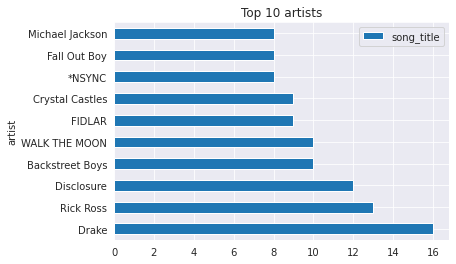

In [85]:
top_10_artists.plot.barh()
plt.title("Top 10 artists");

### Top 5 loudest tracks

In [79]:
top_10_loudest = songs[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:10]
top_10_loudest

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor
1571,-27.350,I Got It Bad And That Ain't Good
1541,-26.924,Two Sleepy People
1546,-25.766,Almas vaggvisa
817,-25.756,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr..."
1537,-25.358,Blue in Green


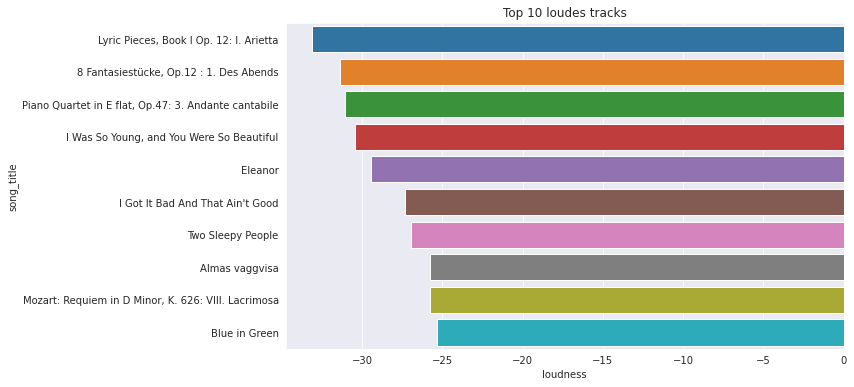

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x="loudness", y="song_title", data=top_10_loudest)
plt.title("Top 10 loudes tracks")
plt.show()

### Artist with the most danceability song

In [98]:
dance = songs[["song_title","danceability"]].sort_values(by="danceability", ascending=False)[:5]
dance

,song_title,danceability
1433,Flashwind - Radio Edit,0.984
1901,SexyBack,0.967
604,Check Me Out Like,0.962
32,Best Friend,0.959
1957,Ice Ice Baby,0.959


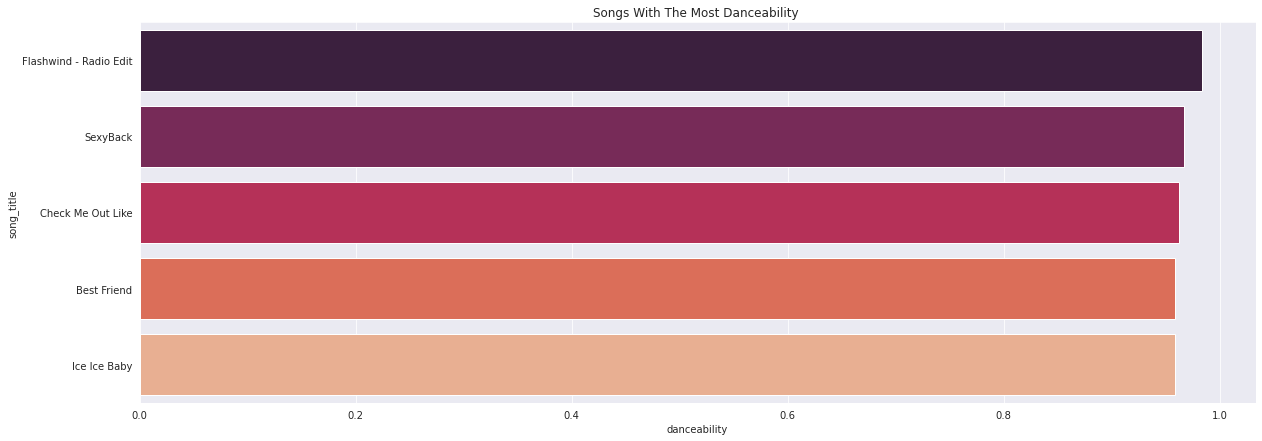

In [103]:
plt.figure(figsize=(20, 7))
sns.barplot(x="danceability", y="song_title", data=dance,palette="rocket")
plt.title("Songs With The Most Danceability ")
plt.show()

### To 10 instrumentalness tracks

In [105]:
instrumental_tracks = songs[["instrumentalness", "song_title", "artist"]].sort_values(by="instrumentalness", ascending=False)[:5]
instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


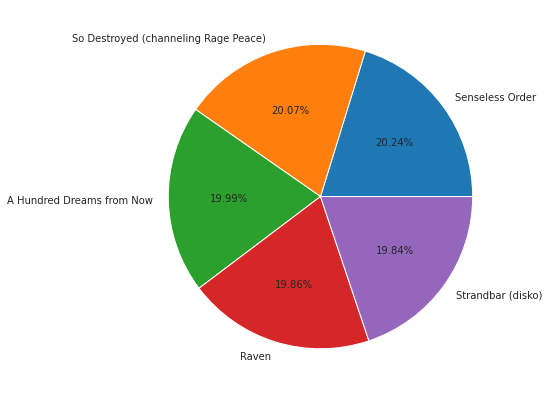

In [108]:
plt.figure(figsize=(12, 7))
plt.pie(x="instrumentalness", data=instrumental_tracks, autopct='%1.2f%%', labels=instrumental_tracks.song_title)
plt.show()

In [109]:
feature_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness", "liveness", "speechiness", "valence"]

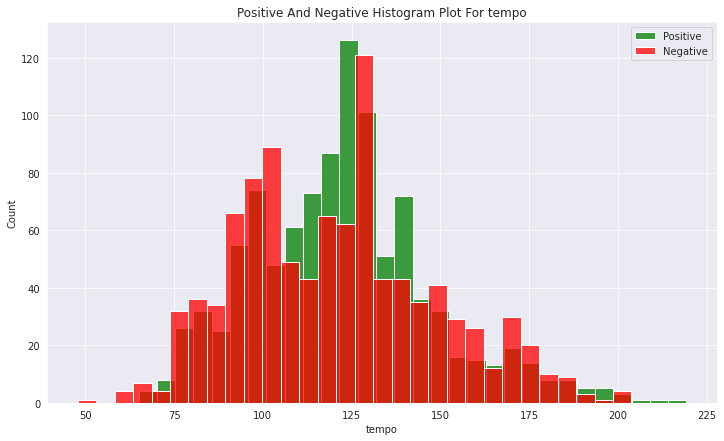

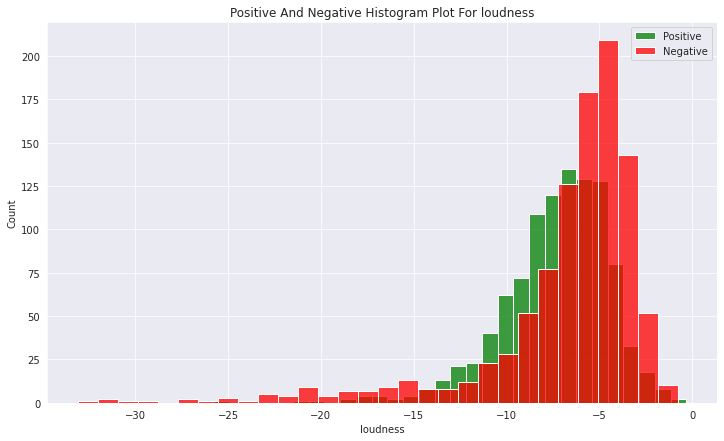

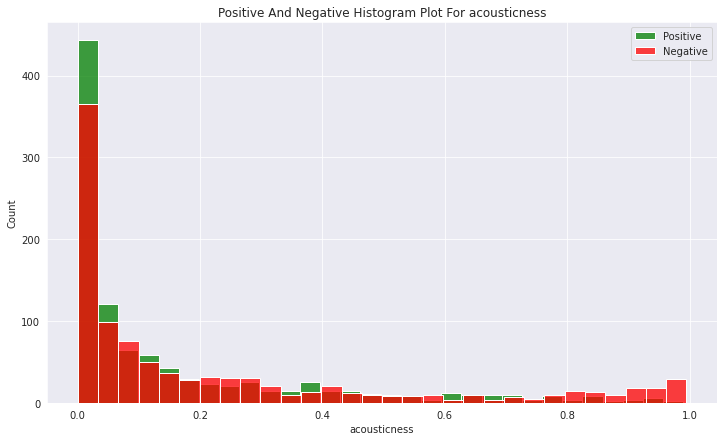

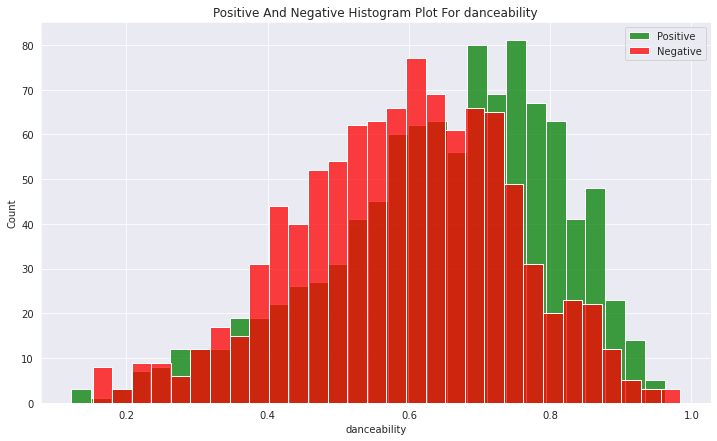

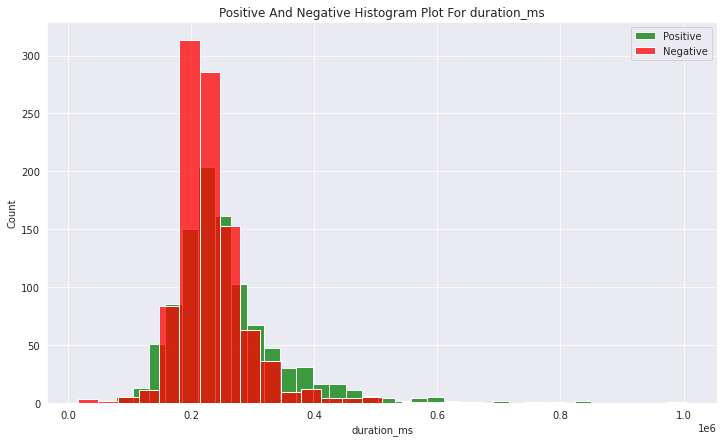

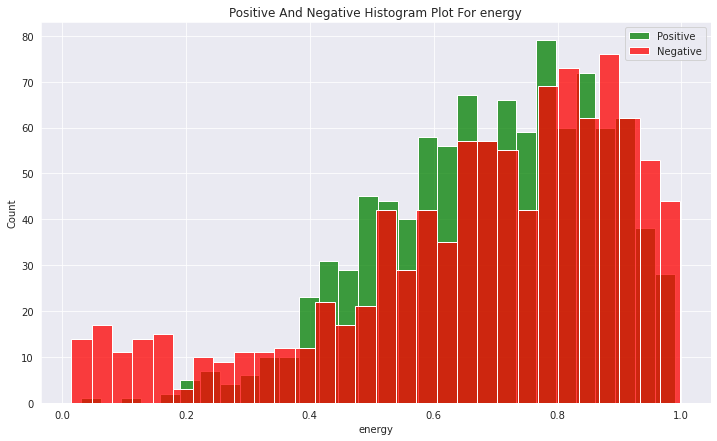

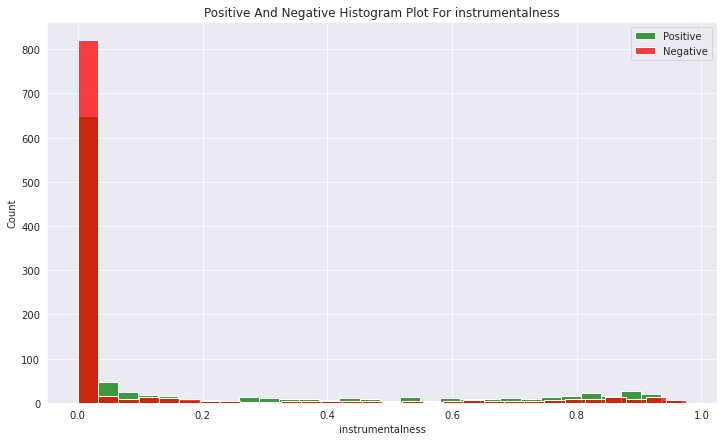

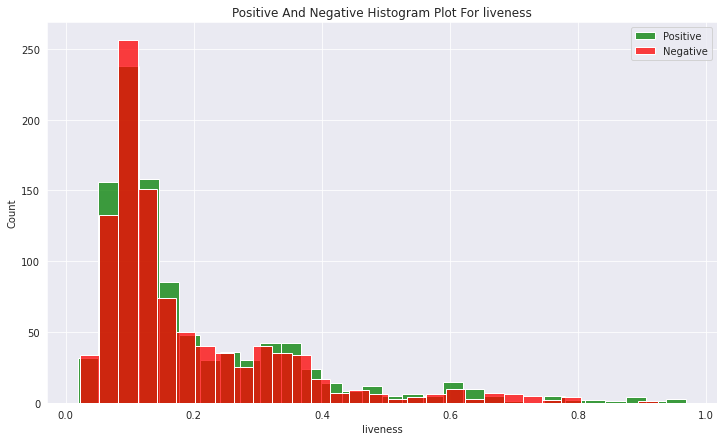

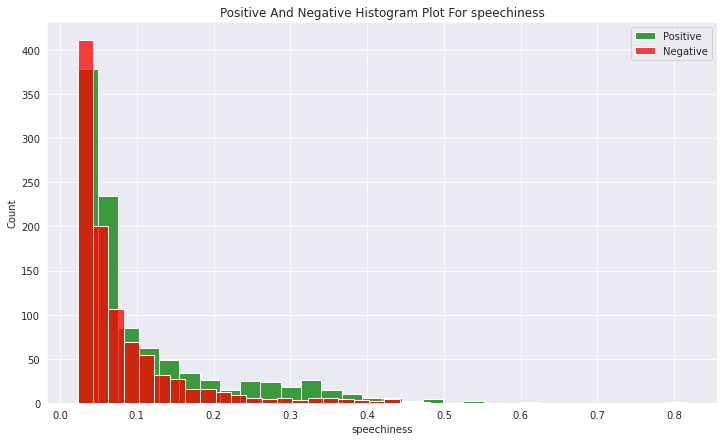

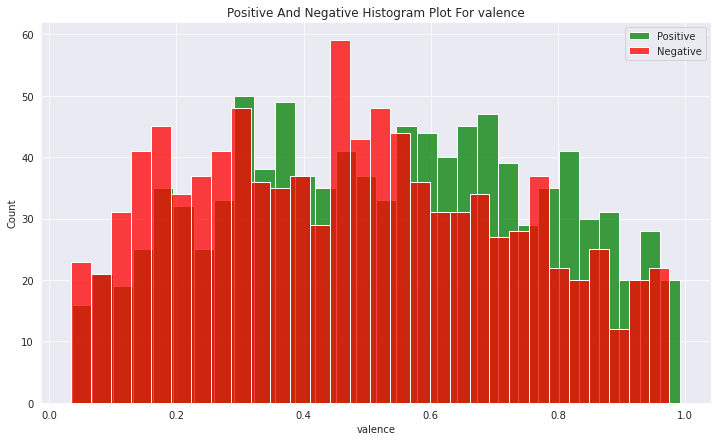

In [112]:
for feature_col in feature_cols:
    pos_data = songs[songs["target"] == 1][feature_col]
    neg_data = songs[songs["target"] == 0][feature_col]
    
    plt.figure(figsize=(12, 7))
     
    
    sns.histplot(pos_data, bins=30, label="Positive", color="green")
    sns.histplot(neg_data, bins=30, label="Negative", color="red")
    
    
    plt.legend(loc="upper right")
    plt.title(f"Positive And Negative Histogram Plot For {feature_col}")
    plt.show()